<a href="https://colab.research.google.com/github/obarnstedt/LINdoscope2023/blob/main/notebooks/intro_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Python
This notebook serves as a brief(!) introduction into basic Python functionality, and how it can be used most effectively to handle basic data relevant to neuroscience.

The focus here is on introducing some pandas functionality, statistics, and interactive plotting.

It was written by [Oliver Barnstedt](https://github.com/obarnstedt) for [LINdoscope 2023](https://www.lindoscope.com).

In [69]:
# Installing packages not included in Colab
!pip install --upgrade bokeh==2.4.3  # Bokeh 3 is currently incompatible with pandas-bokeh
!pip install pandas-bokeh
!pip install pingouin
!pip install dabest

# Lists and dictionaries

In [70]:
a_list = [1, 2, 3, 4]
a_list

[1, 2, 3, 4]

In [71]:
a_list[0]  # selecting the first list element

1

In [72]:
a_list + 3  # this will throw an error message

TypeError: ignored

In [73]:
[a + 3 for a in a_list]  # this is how you manipulate list elements

[4, 5, 6, 7]

In [74]:
a_dictionary = {'a': 1, 'b': 2, 'c': 3}
a_dictionary

{'a': 1, 'b': 2, 'c': 3}

In [75]:
a_dictionary[0]  # this throws an error; dictionary elements have no true order

KeyError: ignored

In [76]:
a_dictionary['a']

1

In [77]:
for key, value in a_dictionary.items():  # iterating over a dictionary
  print(f'key: {key}; value: {value}')

key: a; value: 1
key: b; value: 2
key: c; value: 3


# Data handling

In [78]:
import numpy as np  # comprehensive package for numeric array calculations
import pandas as pd  # numpy-based dataframe calculations

In [79]:
array = np.random.rand(20, 4)
array

array([[0.79149308, 0.76892331, 0.14529505, 0.83148331],
       [0.91127949, 0.50620337, 0.53274432, 0.45218027],
       [0.85256597, 0.72388984, 0.20474691, 0.79044507],
       [0.16331373, 0.09400891, 0.62706351, 0.15382347],
       [0.89541456, 0.25813961, 0.60620986, 0.02291407],
       [0.64486165, 0.64602024, 0.72950124, 0.14846537],
       [0.25063914, 0.89549416, 0.43988539, 0.92523497],
       [0.69053857, 0.68623465, 0.99946738, 0.82665092],
       [0.79565799, 0.44408747, 0.35082327, 0.15276933],
       [0.47623053, 0.23360971, 0.15410101, 0.19745981],
       [0.50796813, 0.85104772, 0.92826763, 0.73776844],
       [0.55980629, 0.45217521, 0.30991589, 0.52649364],
       [0.40270795, 0.05547295, 0.63445514, 0.04250545],
       [0.19992017, 0.14689554, 0.55783517, 0.18280901],
       [0.18908535, 0.35738832, 0.87871348, 0.27013881],
       [0.45991722, 0.09745961, 0.04812983, 0.26606973],
       [0.29881691, 0.44603521, 0.40615943, 0.38955117],
       [0.06803874, 0.67185421,

In [80]:
df = pd.DataFrame(data=array, index=range(20), columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
0,0.791493,0.768923,0.145295,0.831483
1,0.911279,0.506203,0.532744,0.452180
2,0.852566,0.723890,0.204747,0.790445
3,0.163314,0.094009,0.627064,0.153823
4,0.895415,0.258140,0.606210,0.022914
5,0.644862,0.646020,0.729501,0.148465
6,0.250639,0.895494,0.439885,0.925235
7,0.690539,0.686235,0.999467,0.826651
8,0.795658,0.444087,0.350823,0.152769
9,0.476231,0.233610,0.154101,0.197460


In [81]:
df.rolling(window=3).mean()[::3] # 3x downsampling

,col1,col2,col3,col4
0,NaN,NaN,NaN,NaN
3,0.642386,0.441367,0.454852,0.465483
6,0.596972,0.599885,0.591865,0.365538
9,0.654142,0.454644,0.501464,0.392293
12,0.490161,0.452899,0.624213,0.435589
15,0.282974,0.200581,0.494893,0.239673
18,0.203541,0.415989,0.547510,0.558440


## Indexing

In [82]:
df.loc[(df.col1>0.5)&(df.col2<0.5)]  # select all rows where 'col1' is greater 0.5, 'col2' is smaller 0.5

,col1,col2,col3,col4
4,0.895415,0.258140,0.606210,0.022914
8,0.795658,0.444087,0.350823,0.152769
11,0.559806,0.452175,0.309916,0.526494


## Missing values

In [83]:
df.loc[(df.col1>0.5)&(df.col2<0.5)] = np.nan  # set these rows to NAN
df

,col1,col2,col3,col4
0,0.791493,0.768923,0.145295,0.831483
1,0.911279,0.506203,0.532744,0.452180
2,0.852566,0.723890,0.204747,0.790445
3,0.163314,0.094009,0.627064,0.153823
4,NaN,NaN,NaN,NaN
5,0.644862,0.646020,0.729501,0.148465
6,0.250639,0.895494,0.439885,0.925235
7,0.690539,0.686235,0.999467,0.826651
8,NaN,NaN,NaN,NaN
9,0.476231,0.233610,0.154101,0.197460


In [84]:
df.dropna()  # drop all rows with missing values (not saved!)

,col1,col2,col3,col4
0,0.791493,0.768923,0.145295,0.831483
1,0.911279,0.506203,0.532744,0.452180
2,0.852566,0.723890,0.204747,0.790445
3,0.163314,0.094009,0.627064,0.153823
5,0.644862,0.646020,0.729501,0.148465
6,0.250639,0.895494,0.439885,0.925235
7,0.690539,0.686235,0.999467,0.826651
9,0.476231,0.233610,0.154101,0.197460
10,0.507968,0.851048,0.928268,0.737768
12,0.402708,0.055473,0.634455,0.042505


In [85]:
df.interpolate(method='linear')  # interpolate missing values with 'linear' method

,col1,col2,col3,col4
0,0.791493,0.768923,0.145295,0.831483
1,0.911279,0.506203,0.532744,0.452180
2,0.852566,0.723890,0.204747,0.790445
3,0.163314,0.094009,0.627064,0.153823
4,0.404088,0.370015,0.678282,0.151144
5,0.644862,0.646020,0.729501,0.148465
6,0.250639,0.895494,0.439885,0.925235
7,0.690539,0.686235,0.999467,0.826651
8,0.583385,0.459922,0.576784,0.512055
9,0.476231,0.233610,0.154101,0.197460


# Visualisation

## Static plotting

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.ion()  # interactive mode on

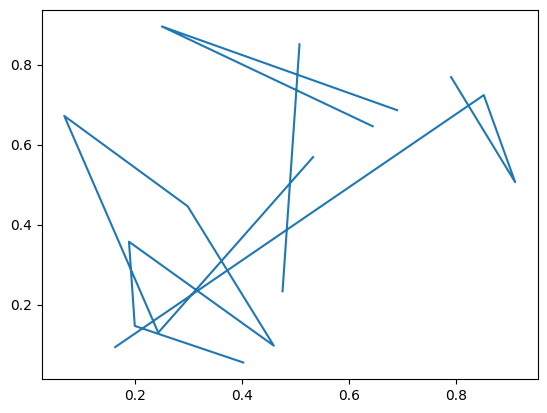

In [116]:
plt.plot(df.col1, df.col2)  # plot line of 'col2' against 'col1' in Euclidean space

<Axes: xlabel='col1', ylabel='col2'>

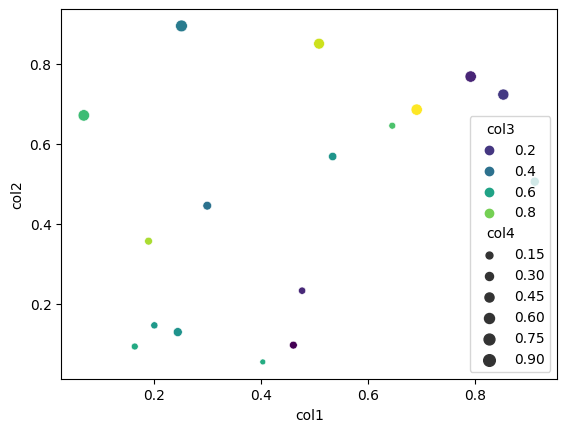

In [117]:
sns.scatterplot(data=df, x='col1', y='col2', hue='col3', size='col4', palette='viridis')

<Axes: >

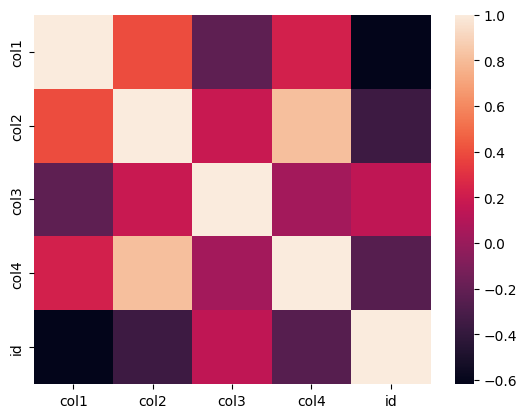

In [118]:
sns.heatmap(df.corr(), label=True)  # make a heatmap of cross-correlations

## Interactive plotting

In [119]:
pd.options.plotting.backend = "plotly"  # set pandas plotting backend to the interactive visualisation platform 'plotly'
df.plot()

In [120]:
df.plot(kind='box')

In [121]:
df.plot(kind='scatter')

In [122]:
import pandas_bokeh
pandas_bokeh.output_notebook()
df.plot_bokeh()

Figure(id='1717', ...)

# Statistics

## Classical statistics

In [123]:
df  # let's have another look at our data frame

,col1,col2,col3,col4,id
0,0.791493,0.768923,0.145295,0.831483,0
1,0.911279,0.506203,0.532744,0.452180,1
2,0.852566,0.723890,0.204747,0.790445,2
3,0.163314,0.094009,0.627064,0.153823,3
4,NaN,NaN,NaN,NaN,4
5,0.644862,0.646020,0.729501,0.148465,5
6,0.250639,0.895494,0.439885,0.925235,6
7,0.690539,0.686235,0.999467,0.826651,7
8,NaN,NaN,NaN,NaN,8
9,0.476231,0.233610,0.154101,0.197460,9


In [95]:
df.describe()  # pandas gives us basic statistics, ignoring NA values

,col1,col2,col3,col4
count,17.000000,17.000000,17.000000,17.000000
mean,0.452032,0.463507,0.533434,0.461013
std,0.257923,0.290475,0.278539,0.299669
min,0.068039,0.055473,0.048130,0.042505
25%,0.243767,0.146896,0.406159,0.197460
50%,0.459917,0.506203,0.545638,0.389551
75%,0.644862,0.686235,0.700250,0.790445
max,0.911279,0.895494,0.999467,0.925235


Pingouin offers a wide range of test statistics that are both easy and intuitive to deploy and interpret; it also offers some nice plotting options. All functions can be found here: https://pingouin-stats.org/build/html/api.html#

In [96]:
import pingouin as pg
pg.ttest(df.col1, df.col2)  # run a simple independent t-test on 'col1' and 'col2'

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.121798,32,two-sided,0.903821,"[-0.2, 0.18]",0.041776,0.331,0.051602


In [97]:
pg.ttest(df.col1, df.col2, paired=True)  # assuming these are paired samples

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.156644,16,two-sided,0.877485,"[-0.17, 0.14]",0.041776,0.252,0.053018


In [125]:
plt.ioff()  # turns automatic display of plots off (otherwise plots below are shown twice)

/usr/local/lib/python3.10/dist-packages/pingouin/plotting.py:818: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.10/dist-packages/pingouin/plotting.py:869: UserWarning:

FixedFormatter should only be used together with FixedLocator



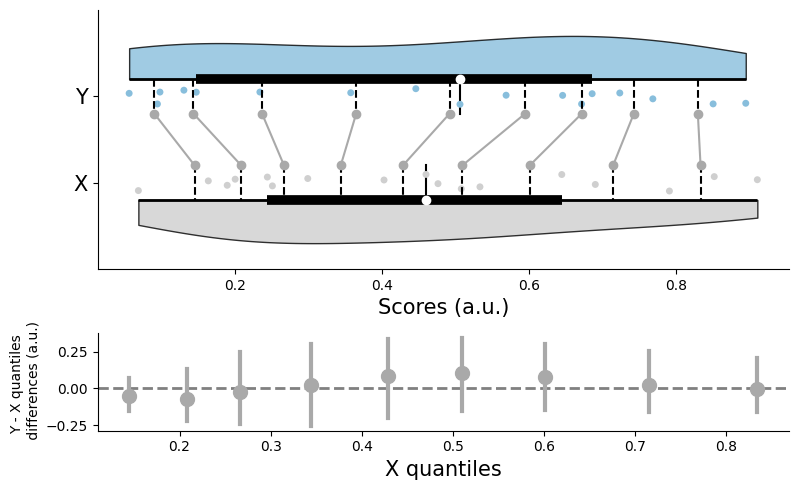

In [126]:
pg.plot_shift(df.dropna().col1, df.dropna().col2)  # pingouin can also do some plotting

## Transforming data frames from wide to long format

While many of us are used to collecting data in "wide format" in which different kinds of measurements are simply added as additional columns, this format quickly breaks down if we're dealing with multidimensional data (imagine we were collecting both behavioural performance values for each mouse per day as well as their respective weight). To get the most out of data frames, we need to transform data frames into a long format then, in which the kind of measurement is specified in one column, and the values are collected in another. This enables enhanced data interrogation and statistics.

In [99]:
df['id'] = df.index  # we're adding an 'id' column based on the data frame index
df

,col1,col2,col3,col4,id
0,0.791493,0.768923,0.145295,0.831483,0
1,0.911279,0.506203,0.532744,0.452180,1
2,0.852566,0.723890,0.204747,0.790445,2
3,0.163314,0.094009,0.627064,0.153823,3
4,NaN,NaN,NaN,NaN,4
5,0.644862,0.646020,0.729501,0.148465,5
6,0.250639,0.895494,0.439885,0.925235,6
7,0.690539,0.686235,0.999467,0.826651,7
8,NaN,NaN,NaN,NaN,8
9,0.476231,0.233610,0.154101,0.197460,9


In [100]:
df_long = df.melt(var_name='measurement', id_vars='id')  # transformation into long format
df_long

,id,measurement,value
0,0,col1,0.791493
1,1,col1,0.911279
2,2,col1,0.852566
3,3,col1,0.163314
4,4,col1,NaN
...,...,...,...
75,15,col4,0.266070
76,16,col4,0.389551
77,17,col4,0.855037
78,18,col4,0.430732


In [129]:
plt.ion()  # interactive mode on

<Axes: xlabel='measurement', ylabel='value'>

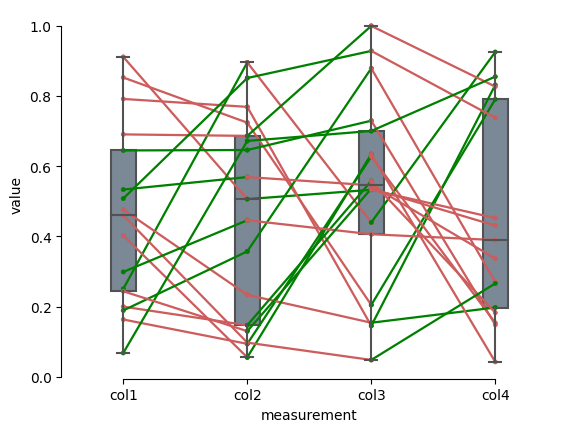

In [130]:
pg.plot_paired(data=df_long, within='measurement', subject='id', dv='value')  # let's plot the data pretending we have four measurements from 20 subjects

In [131]:
pg.rm_anova(data=df_long, within='measurement', subject='id', dv='value')  # running a repeated-measures ANOVA across measurements

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,measurement,3,48,0.403101,0.751415,0.694784,0.013972,0.749219,False,0.43855,0.033356


In [132]:
pg.pairwise_tests(data=df_long, within='measurement', subject='id', dv='value', padjust='bonf')  # post-hoc tests using Bonferroni correction

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,measurement,col1,col2,True,True,-0.156644,16.0,two-sided,0.877485,1.0,bonf,0.252,-0.040790
1,measurement,col1,col3,True,True,-0.798666,16.0,two-sided,0.436180,1.0,bonf,0.33,-0.296090
2,measurement,col1,col4,True,True,-0.106322,16.0,two-sided,0.916649,1.0,bonf,0.25,-0.031365
3,measurement,col2,col3,True,True,-0.789976,16.0,two-sided,0.441093,1.0,bonf,0.328,-0.239923
4,measurement,col2,col4,True,True,0.057285,16.0,two-sided,0.955027,1.0,bonf,0.249,0.008252
5,measurement,col3,col4,True,True,0.742989,16.0,two-sided,0.468258,1.0,bonf,0.318,0.244420


## Estimation statistics

Classical statistics have various shortcomings that can be overcome by using estimation statistics. The [DABEST package](https://acclab.github.io/DABEST-python-docs/index.html) from the Claridge-Chang lab makes it fairly easy to employ and visualise.

In [133]:
import dabest
df_dabest = dabest.load(df, idx=('col1', 'col2', 'col3', 'col4'), paired='sequential', id_col='id')  # load data frame as a dabest object
df_dabest

DABEST v2023.02.14
                  
Good evening!
The current time is Mon Sep 11 19:37:38 2023.

Paired effect size(s) for the sequential design of repeated-measures experiment 
with 95% confidence intervals will be computed for:
1. col2 minus col1
2. col3 minus col2
3. col4 minus col3

5000 resamples will be used to generate the effect size bootstraps.

In [134]:
df_dabest.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,col1,col2,17,17,mean difference,sequential,0.011475,95,-0.112534,0.162956,0.8832,0.746658,69.0,0.877485,-0.156644
1,col2,col3,17,17,mean difference,sequential,0.069927,95,-0.109923,0.223661,0.4666,0.430679,59.0,0.441093,-0.789976
2,col3,col4,17,17,mean difference,sequential,-0.072421,95,-0.239638,0.133618,0.4832,0.430679,59.0,0.468258,0.742989


In [138]:
plt.ioff()

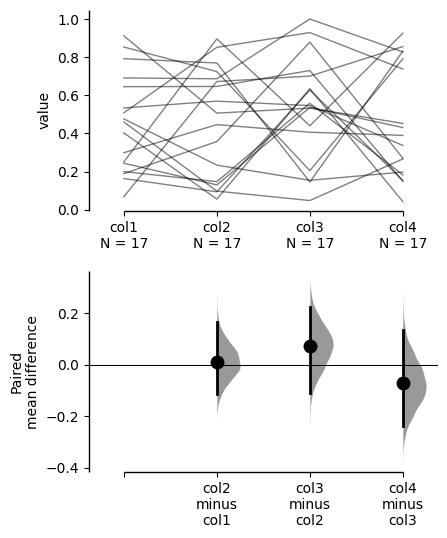

In [139]:
df_dabest.mean_diff.plot()